# NYC → Key West Bicycle Odometer
We’ll load end-of-day **cumulative** odometer readings, compute **daily** miles with `diff()`, visualize, and export a summary.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
cumulative_miles = [55, 120, 190, 260, 335, 420, 515, 600, 690, 780]

s = pd.Series(cumulative_miles, index=range(1, len(cumulative_miles)+1), name="CumulativeMiles")
s.index.name = "Day"
s


Day
1      55
2     120
3     190
4     260
5     335
6     420
7     515
8     600
9     690
10    780
Name: CumulativeMiles, dtype: int64

In [5]:
problems = []
if not s.is_monotonic_increasing:
    problems.append("Values must be non-decreasing (each day >= previous).")
if (s.diff() < 0).any():
    problems.append("Found a negative difference. Check your entries.")

print("OK ✅" if not problems else "⚠️ " + " | ".join(problems))


OK ✅


In [6]:
daily = s.diff().fillna(s.iloc[0]).astype(float)
summary = pd.DataFrame({"CumulativeMiles": s, "DailyMiles": daily})
summary


,CumulativeMiles,DailyMiles
Day,,
1,55,55.0
2,120,65.0
3,190,70.0
4,260,70.0
5,335,75.0
6,420,85.0
7,515,95.0
8,600,85.0
9,690,90.0


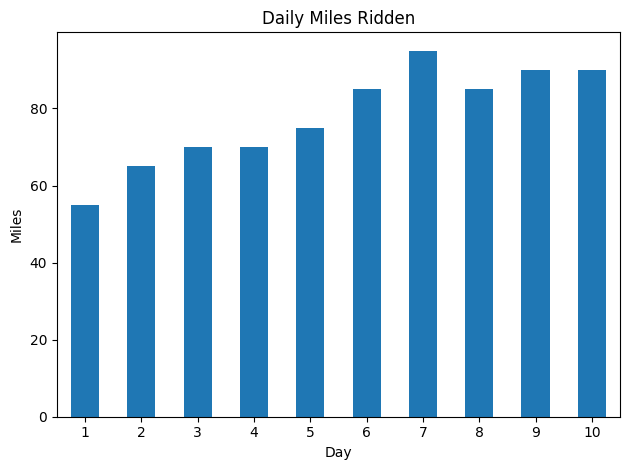

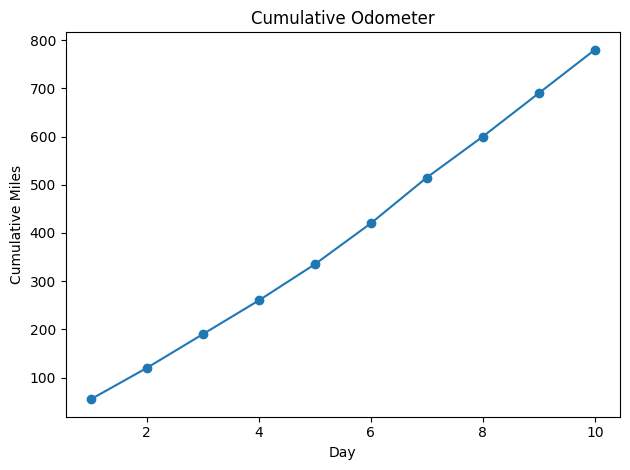

In [7]:
summary["DailyMiles"].plot(kind="bar", rot=0)
plt.ylabel("Miles")
plt.title("Daily Miles Ridden")
plt.tight_layout()
plt.show()

s.plot(kind="line", marker="o")
plt.xlabel("Day")
plt.ylabel("Cumulative Miles")
plt.title("Cumulative Odometer")
plt.tight_layout()
plt.show()


In [8]:
print(summary["DailyMiles"].describe()[["count","mean","std","min","25%","50%","75%","max"]])
summary.to_csv("daily_miles_summary.csv", index=True)
print("Saved daily_miles_summary.csv")


count    10.000000
mean     78.000000
std      12.952906
min      55.000000
25%      70.000000
50%      80.000000
75%      88.750000
max      95.000000
Name: DailyMiles, dtype: float64
Saved daily_miles_summary.csv
